# Udacity's Data Scientist ND Capstone

In this project, I connected five different data providers using different methodologies to asnwer some pending questions on the biological sciences, more specifically, the zoological systematics, regarding journals' contributions to the discovery of new species, and their respective open-access policies.

As a PhD in the field, it was quite excting and fun to work on this project.


## Importing Libraries and Modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import pickle

from sqlalchemy import create_engine

import etl.extract.tb as tb_proc 
import etl.extract.wos as wos_parser
import etl.transform.transform as transform
import etl.transform.doaj as doaj
import etl.transform.sherpa_romeo as sherpa
import etl.load as load
import test_units.test_extract as test_ext
import test_units.test_transform as test_tf

%matplotlib inline

## CRISP-DM

This process was carefully conducted in order to decide the questions I would try to answer. 

**Business Understanding** came from years of experience in the field. As I said before, I'm a PhD in this particular field.

**Data Understanding** came from the previously cited experience, and experiments with the data done in the scope of this project. All sources were known for me, which helped a lot in order to define the goals for this project.

**Prepare Data**, the ETL process, was the most time-consuming part of the project. Data from five different sources were combined to answer the proposed questions. 

The **Results** were obtained, focusing solely on counts (descriptive stats) and data visualization. The questions allowed for this simplistic approach, but they are not, at all, simple to answer due to the complexity of their nature and the disperse, somehow low-quality, data.

No model or deployment were conduct, as this was either out of scope of this particular project or the project's rubric.

### Target questions
- How much of the newly discovered data end up behind paywalls?
- Who are the biggest journals in the science of discovering and describing things?
- How does the sources related to the Zoological Sciences compare to each other in this context?

## ETL

Data from five different providers were combined in order to addressed the proposed questions. Below I describe which provider and the method used to extract the data.

### (E)xtraction

The goal is to have a dataset, per source, with all articles that described one or more species. This means that on the source-specific dataframes the rows will be articles, and the columns, their respective metadata. Here are the sources and the applied method of extraction:

|Source|Description|Method of Extraction|
|--|--|--|
|Web of Science/Zoological Record|According to their website, the "world's leading taxonomic reference and oldest continuing database of animal biology"|Parser on downloaded data|
|TreatmentBank|Taxonomic tretments repository by Plazi|API|
|Zoobank|Official repository for registering scientific names according to the International Code of Zoological Nomenclature|Web scraping|
|Directory of Open-Access Journals (DOAJ)|Directory dedicated to list open-access journals, regardless of their type|API|
|SHERPA/RoMEO|API that brings a variety of information about journals' open-access policies|API|

#### Web of Science/Zoological Records
WoS do not provide an API, as far as I know, and has strict access policies across the board of all of their products. Thus, I downloaded the search results using their GUI, manually, and coded a parser from scratch that loads the data from the 150+ files into a SQLite database.

The specifics on how I queried this system is in the report, Methods section.

In [3]:
# Parse data, creates df
# I commented out this command when I was working on the notebook, to accelerate the process of reloading this dataset
wos = wos_parser.create_df()

# This is commented out because it generates a over 200Mb file that I couldn't push to GitHub, so I'm leaving it here 
#wos_parser.to_pickle(wos, 'data/wos.p')

# Use the non-provided pickle file to reload this, if necessary (faster than re-parsing it!)
#wos = pd.read_pickle('data/wos.p')

In [4]:
# Checking if it loaded
wos.head()

,Publication Type,Zoological Record Accession Number,Document Type,Title,Foreign Title,Authors,Source,Volume,Page Span,Publication Date,...,Journal URL,Item URL,Notes,NaN,Book Authors,Publisher,Publisher Address,International Standard Book Number (ISBN),Editors,Group Authors
0,J,ZOOR14707048981,Article,Orthopterans of the Reserva Biologica Alberto ...,Ortopteros de la Reserva Biologica Alberto Man...,"Barranco, Pablo (pbvega@ual.es)",Boletin de la SEA,47,21-32,31 Dec 2010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,J,ZOOR14707048982,Article,Further considerations on the genus Ananteris ...,NaN,"Lourenco, Wilson R. (arache@mnhn.fr), Duhem, B...",Boletin de la SEA,47,33-38,31 Dec 2010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,J,ZOOR14707048983,Article,Description of a new species of the genus Mela...,Descripcion de una nueva especie del genero Me...,"Ferrer, Julio, Tovar, Alejandro Castro",Boletin de la SEA,47,39-44,31 Dec 2010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,J,ZOOR14707048985,Article,New arachnids from Puerto Rico (Arachnida: Amb...,Nuevos aracnidos de Puerto Rico (Arachnida: Am...,"de Armas, Luis F. (zoologia.ies@ama.cu)",Boletin de la SEA,47,55-64,31 Dec 2010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,J,ZOOR14707048986,Article,Description of new hypogean taxa of Laparoceru...,Descripcion de nuevos Laparocerus hipogeos de ...,"Machado, Antonio (a.machado@telefonica.net), G...",Boletin de la SEA,47,65-69,31 Dec 2010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### TreatmentBank (Plazi)
TreatmentBank has a powerful API with GUI. I used it to built the target query, and copied/pasted their URL into my code. From there I processed the results, adding them into a SQLite database. 

In [5]:
# Process the hard-coded API call and creates a database from it
# I'm commenting out because the SQLite db was provided and it contains a snapshot of the data I analyzed. As this includes an API call, running this now might get new data, changing my results

#tb_proc.create_db(tb_proc.get_data())

# Alternatively, I can simply load the .db
db_connect = create_engine('sqlite:///data/tb.db')

tb = pd.read_sql("docs", con=db_connect)

In [6]:
# Checking if it loaded
tb.head()

,id,authors,year,title,journal,volume,issue,start_page,end_page,num_treats
0,1,"Fernandez-Triana, Jose L & Whitfield, James B ...",2014,First record of the genus Venanus (Hymenoptera...,Biodiversity Data Journal,2,0,4167,4167,4
1,2,"Barrales-Alcala, Diego A. & Francke, Oscar F.",2018,A new Sky Island species of Vaejovis C. L. Koc...,ZooKeys,760,0,37,53,2
2,3,"Guevara-Guerrero, Gonzalo & Bonito, Gregory & ...",2018,"Tuberaztecorum sp. nov., a truffle species fro...",MycoKeys,30,0,61,72,2
3,4,"Balke, Michael & Ruthensteiner, Bernhard & War...",2015,Two new species of Limbodessus diving beetles ...,Biodiversity Data Journal,3,0,7096,7096,4
4,5,"Costa, Wilson J. E. M. & Amorim, Pedro F.",2018,Cryptic species diversity in the Hypsolebiasma...,ZooKeys,777,0,141,158,4


#### Zoobank
As explained, I performed a web scraping to collect data from Zoobank. For this, I used a Scrapy project, with custom Item, ItemLoader, in- and output processors and ItemPipeline. These can't quite be run from here, as far as I know, I can only create a CrawlerProcess that won't have these functionalities. This was then saved into a SQLite database, which is alternatively loaded here.

In [7]:
# Load the .db created from the web scraping
db_connect = create_engine('sqlite:///data/zb.db')

zb = pd.read_sql("docs", con=db_connect)

In [8]:
# Checking if it loaded
zb.head()

,id,authors,year,title,journal,bibref_details,volume,issue,start_page,end_page,from_year
0,1,"Achatz, Johannes G., Matthew D. Hooge, A. Wall...",2010,Systematic revision of acoels with 9+0 sperm u...,Journal of Zoological Systematics and Evolutio...,48(1): 9-32,48,1,9,32,2010
1,2,"Affilastro, Andrés A. O. & Ignacio Garcia-Mauro.",2010,"A new Bothriurus (Scorpiones, Bothriuridae) fr...",Zootaxa,2488: 52-64,2488,,52,64,2010
2,3,"Ahyong, Shane T.",2010,The marine fauna of New Zealand: king crabs of...,No,,,,,,2010
3,4,"Ahyong, Shane T., Keiji Baba, Enrique Macphers...",2010,A new classification of the Galatheoidea (Crus...,Zootaxa,2676: 57-68,2676,,57,68,2010
4,5,"Aibek, Ulykpan & Seiki Yamane.",2010,Discovery of the Subgenera Austrolasius and De...,Japanese Journal of systematic entomology,16(2): 197-202,16,2,197,202,2010


#### Exploratory Analyses: Extraction Tests
Here I will make a series of tests to check if I'm getting all the data that I was supposed to be getting. For that, I'm going to use Python's assert, and some manual observations.


##### Web of Science/Zoological Records
These were the observed results from the WoS GUI, per year:

- 2010: 7207 results
- 2011: 7480 results
- 2012: 7604 results
- 2013: 7655 results
- 2014: 7456 results
- 2015: 7983 results
- 2016: 7859 results
- 2017: 8023 results
- 2018: 7973 results
- 2019: 7664 results
- 2020: 3548 results


In [9]:
# Create a dict with year: official results, to be used on a data consistency test
wos_results = {
    '2010': 7207,
    '2011': 7480,
    '2012': 7604,
    '2013': 7655,
    '2014': 7456,
    '2015': 7983,
    '2016': 7859,
    '2017': 8023,
    '2018': 7973,
    '2019': 7664,
    '2020': 3548,
}

In [10]:
# Checkout column names to get the right one: 'Year Published'
wos.columns

Index([                                     'Publication Type',
                          'Zoological Record Accession Number',
                                               'Document Type',
                                                       'Title',
                                               'Foreign Title',
                                                     'Authors',
                                                      'Source',
                                                      'Volume',
                                                   'Page Span',
                                            'Publication Date',
                                              'Year Published',
                                                    'Language',
                                 'Usage Count (Last 180 Days)',
                                    'Usage Count (Since 2013)',
                                                    'Abstract',
                                        

In [11]:
# Create a pandas.Series with the ordered counts of the 'Year Published' column
wos_years_count = wos['Year Published'].value_counts().sort_index()

In [12]:
# Calling the test with WoS/Zoological Record data
test_ext.check_consistency("WoS/Zoological Records", wos_years_count, wos_results)

--------------------------------------------------------------------------
Testing for... WOS/ZOOLOGICAL RECORDS
--------------------------------------------------------------------------
SUCCESS! Total count was equal between the processed and official results!
--------------------------------------------------------------------------
SUCCESS! the year 2010 seems to be fine!
SUCCESS! the year 2011 seems to be fine!
SUCCESS! the year 2012 seems to be fine!
SUCCESS! the year 2013 seems to be fine!
SUCCESS! the year 2014 seems to be fine!
SUCCESS! the year 2015 seems to be fine!
SUCCESS! the year 2016 seems to be fine!
SUCCESS! the year 2017 seems to be fine!
SUCCESS! the year 2018 seems to be fine!
SUCCESS! the year 2019 seems to be fine!
SUCCESS! the year 2020 seems to be fine!
--------------------------------------------------------------------------


##### TreatmentBank
I can't make new API calls. The reason why is that as the data is live I might risk to get more data than I have got when I first run this, which could cause different results. 

That's why I saved a .pickle file with the entire response of the API on the routine call, besides the .db resulting of the processing of this data. As such, I can compare the total number of records in both (and per year!) to check if my processing missed something or not, using the same function applied to WoS data.

In [13]:
# Creating a dict with the counts of records per year, based on the total response saved from the API call to TreatmentBank

# Open .pickle
with open('data/tb_response.p', 'rb') as p_file:
        tb_response = pickle.load(p_file)

tb_response_years_count = dict()

# Iterate over the full response, and create the counting
for result in tb_response['data']:
    try:
        tb_response_years_count[result['BibYear']] += 1
    except:
        tb_response_years_count[result['BibYear']] = 1

In [14]:
# Create a pandas.Series with the ordered counts of the 'year' column
tb_years_count = tb['year'].value_counts().sort_index()

In [15]:
# Calling the test with TreatmentBank data
test_ext.check_consistency("TreatmentBank", tb_years_count, tb_response_years_count)

--------------------------------------------------------------------------
Testing for... TREATMENTBANK
--------------------------------------------------------------------------
SUCCESS! Total count was equal between the processed and official results!
--------------------------------------------------------------------------
SUCCESS! the year 2014 seems to be fine!
SUCCESS! the year 2018 seems to be fine!
SUCCESS! the year 2015 seems to be fine!
SUCCESS! the year 2016 seems to be fine!
SUCCESS! the year 2013 seems to be fine!
SUCCESS! the year 2017 seems to be fine!
SUCCESS! the year 2011 seems to be fine!
SUCCESS! the year 2012 seems to be fine!
SUCCESS! the year 2020 seems to be fine!
SUCCESS! the year 2010 seems to be fine!
SUCCESS! the year 2019 seems to be fine!
--------------------------------------------------------------------------


##### Zoobank
These were the observed results from the Zoobank, per year:

- 2010: 1128 results
- 2011: 1430 results
- 2012: 2482 results
- 2013: 4293 results
- 2014: 4829 results
- 2015: 5552 results
- 2016: 5732 results
- 2017: 6098 results
- 2018: 6401 results
- 2019: 6386 results
- 2020: 4554 results

In [16]:
# Create a dict with year: official results, to be used on a data consistency test
zb_results = {
    '2010': 1128,
    '2011': 1430,
    '2012': 2482,
    '2013': 4293,
    '2014': 4829,
    '2015': 5552,
    '2016': 5732,
    '2017': 6098,
    '2018': 6401,
    '2019': 6386,
    '2020': 4554,
}

In [17]:
# Check the existing columns in this dataframe
list(zb.columns)

['id',
 'authors',
 'year',
 'title',
 'journal',
 'bibref_details',
 'volume',
 'issue',
 'start_page',
 'end_page',
 'from_year']

Here there is one interesting caveat. Zoobank allow users to register papers from the past, and when queried by year, it shows not the publications published on that year, but the publications **registred** on that year. 

As such, we might have all sort of years in the column 'year'.

In [18]:
# Create a pandas.Series with the ordered counts of the 'year' column
zb_years_count = zb['year'].value_counts().sort_index()

# Check results
zb_years_count

1847       2
1877       2
1878       1
1880       2
1881       1
1883       1
1887       2
1888       2
1889       3
1894       1
1896       2
1898       2
1902       1
1905       1
1917       1
1919       3
1923       1
1927       3
1932       1
1933       1
1936       1
1937       5
1951       4
1952       3
1960       1
1962       1
1967       1
1969       1
1972       2
1986       1
1989       1
1996       2
1999       4
2001       1
2002       1
2003       9
2004       1
2008       1
2009       4
2010    1023
2011    1318
2012    2387
2013    4253
2014    4774
2015    5550
2016    5779
2017    6119
2018    6434
2019    6497
2020    4674
Name: year, dtype: int64

To address this situation, I included a column on zb.db called 'from_year', which extracts the year being queried on the response.url, inside the parser() of the spider used to scrape Zoobank, and add to this column. 

This means that we can get the total (included) per year, to compare with the official results.

In [19]:
# Create a pandas.Series with the ordered counts of the 'Year Published' column
zb_years_count = zb['from_year'].value_counts().sort_index()

# Check results
zb_years_count

2010    1128
2011    1430
2012    2482
2013    4293
2014    4829
2015    5552
2016    5732
2017    6098
2018    6401
2019    6386
2020    4554
Name: from_year, dtype: int64

In [20]:
# Now that I have both dictionary with official results and the pandas.Series with the processed results, I can call the unit test function
test_ext.check_consistency("Zoobank", zb_years_count, zb_results) 

--------------------------------------------------------------------------
Testing for... ZOOBANK
--------------------------------------------------------------------------
SUCCESS! Total count was equal between the processed and official results!
--------------------------------------------------------------------------
SUCCESS! the year 2010 seems to be fine!
SUCCESS! the year 2011 seems to be fine!
SUCCESS! the year 2012 seems to be fine!
SUCCESS! the year 2013 seems to be fine!
SUCCESS! the year 2014 seems to be fine!
SUCCESS! the year 2015 seems to be fine!
SUCCESS! the year 2016 seems to be fine!
SUCCESS! the year 2017 seems to be fine!
SUCCESS! the year 2018 seems to be fine!
SUCCESS! the year 2019 seems to be fine!
SUCCESS! the year 2020 seems to be fine!
--------------------------------------------------------------------------


It seems that the data I processed into databases are consistent with the data observed on the sources and that the processing were completed flawlessly. 

It's time to move on.

### (T)ransform

I'm aiming one single pandas.DataFrame with the counts of papers for each one of the three data sources, grouped per journal, with years on the columns. Thus, it's a MultiIndex dataframe (journal x Source/Year). But to achieve this, I want first check the following aspects of these data for all three sources:

1. Check for duplicates
2. Check the amount of NaN on the to-be-used 'year' columns
3. Group by journal and check the data quality of the journals' names


#### Exploratory Analyses: Before Transform


##### Web of Science/Zoological Records

In [21]:
# First, check the available columns again
wos.columns

Index([                                     'Publication Type',
                          'Zoological Record Accession Number',
                                               'Document Type',
                                                       'Title',
                                               'Foreign Title',
                                                     'Authors',
                                                      'Source',
                                                      'Volume',
                                                   'Page Span',
                                            'Publication Date',
                                              'Year Published',
                                                    'Language',
                                 'Usage Count (Last 180 Days)',
                                    'Usage Count (Since 2013)',
                                                    'Abstract',
                                        

###### Duplicates

With this I can see that the column 'Digital Object Identifier (DOI)' might contain a persistent, unique identifier, but not all papers will have it. So I'll perform two different checks for duplicates for this source:

1. Based on 'Digital Object Identifier (DOI)'
2. Based on the columns: 'Source', 'Year Published', 'Volume', 'Issue', 'Page Span'

In [22]:
# Method 01 - DOI

# First, select the ones that has DOIs
wos_duplicates = wos.dropna(subset=['Digital Object Identifier (DOI)'], how='all', inplace=False)

# Checks if there were any NaNs in this column
wos_duplicates.shape[0] - wos.shape[0]

-72484

This high number simply means that there are a lot of NaNs in the column 'Digital Object Identifier (DOI) - which is actually expected. Moving on...

In [23]:
# Then, search for duplicates. 'True' will indicate the existence of them.
wos_duplicates.duplicated(subset=['Digital Object Identifier (DOI)'], keep=False).value_counts()

False    7964
True        4
dtype: int64

In [24]:
# Checking these four duplicates...
wos_duplicates[wos_duplicates.duplicated(subset=['Digital Object Identifier (DOI)'], keep=False)]

,Publication Type,Zoological Record Accession Number,Document Type,Title,Foreign Title,Authors,Source,Volume,Page Span,Publication Date,...,Journal URL,Item URL,Notes,NaN,Book Authors,Publisher,Publisher Address,International Standard Book Number (ISBN),Editors,Group Authors
77,J,ZOOR14704030516,Article,A New Genus of the Spider Family Caponiidae (A...,NaN,"Sanchez-Ruiz, Alexander (alex@bioeco.ciges.inf...",American Museum Novitates,3705,1-44,Dec 29 2010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10549,J,ZOOR14707054161,Article,Apseudes talpa revisited (Crustacea; Tanaidace...,NaN,"Larsen, Kim (tanaids@hotmail.com), Bertocci, I...",Zootaxa,2886,19-30,23 May 2011,...,http://www.mapress.com/zootaxa/list/2011/2886....,http://www.mapress.com/zootaxa/2011/2/zt02886p...,NaN,21594100,NaN,NaN,NaN,NaN,NaN,NaN
11930,J,ZOOR14705036582,Article,"The Goblin Spider Genus Aprusia Simon, 1893 (A...",NaN,"Grismado, Cristian J. (grismado@macn.gov.ar), ...",American Museum Novitates,3706,1-21,Feb 3 2011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12433,J,ZOOR14705041437,Article,Tanaidaceans (Crustacea) from the Central Paci...,NaN,"Larsen, Kim (tanaids@hotmail.com)",ZooKeys,87,19-41,2011,...,http://www.pensoft.net/journals/zookeys/http:/...,http://www.pensoft.net/journal_home_page.php?j...,NaN,21594100,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# They doesn't seem to be duplicates. Check their DOIs
wos_duplicates[wos_duplicates.duplicated(subset=['Digital Object Identifier (DOI)'], keep=False)]['Digital Object Identifier (DOI)']

77               10.1206/3705.2
10549    10.3897/zookeys.87.784
11930            10.1206/3705.2
12433    10.3897/zookeys.87.784
Name: Digital Object Identifier (DOI), dtype: object

They have the same DOI, but they are clearly different papers (if you look into title, authors, and everything else!) So, **false-positives**, despite the same DOIs. Moving on...

In [26]:
# Method 02

# Stores records that is not NaN on all selected fields
wos_duplicates = wos.dropna(subset=['Source', 'Year Published', 'Volume', 'Issue', 'Page Span'], how='all', inplace=False)

# Compare the lenght of the original df with this recently created one. Zero means no record that met the criteria was found
wos_duplicates.shape[0] - wos.shape[0]

0

In [27]:
# If there are no all-NaNs, then, check for duplicates
wos_duplicates.duplicated(subset=['Source', 'Year Published', 'Volume', 'Issue', 'Page Span'], keep=False).value_counts()

False    80194
True       258
dtype: int64

In [28]:
# A lot! Checking these 258...
wos_duplicates[wos_duplicates.duplicated(subset=['Source', 'Year Published', 'Volume', 'Issue', 'Page Span'], keep=False)]

,Publication Type,Zoological Record Accession Number,Document Type,Title,Foreign Title,Authors,Source,Volume,Page Span,Publication Date,...,Journal URL,Item URL,Notes,NaN,Book Authors,Publisher,Publisher Address,International Standard Book Number (ISBN),Editors,Group Authors
1296,J,ZOOR15410067947,Article,Bryozoans from the Jurginskaya Formation (Fame...,NaN,"Tolokonnikova, Zoya (zalatoi@yandex.ru)",Geologos,16,139-152,Oct 2010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2504,J,ZOOR14801000011,Article,THE GENUS PSORTHASPIS (HYMENOPTERA: POMPILIDAE...,NaN,"Rodriquez, Juanita (juanitarodrigueza@gmail.co...",Caldasia,32,435-441,July-Dec 2010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2505,J,ZOOR14801000012,Article,Three new species of Hyphessobrycon group hete...,Tres nuevas especies de Hyphessobrycon grupo h...,"Garcia-Alzate, Carlos A. (cagarcia@uniquindio....",Caldasia,32,443-461,July-Dec 2010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5670,J,ZOOR15009042744,Article,THE GENUS PSORTHASPIS (HYMENOPTERA: POMPILIDAE...,NaN,"Rodriguez, Juanita (juanitarodrigueza@gmail.co...",Caldasia,32,435-441,2010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5671,J,ZOOR15009042745,Article,Three new species of Hyphessobrycon group hete...,TRES NUEVAS ESPECIES DE Hyphessobrycon GRUPO h...,"Garcia-Alzate, Carlos A. (cagarcia@uniquindio....",Caldasia,32,443-461,2010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80071,J,ZOOR15604029227,Article,Description of a new species of the genus Acro...,NaN,"Okamoto, Makoto (epigonidae@gmail.com), Willia...",Ichthyological Research,67,39-49,Jan 2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80119,J,ZOOR15607047778,Article,"Cercyon Leach, 1817 (Coleoptera: Hydrophilidae...",NaN,"Clarkson, Bruno, Mise, Kleber M., Almeida, Luc...",Revista Brasileira de Entomologia,64,1-8,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80121,J,ZOOR15607048143,Article,Veliidae (Insecta: Heteroptera: Gerromorpha) f...,NaN,"Morales, Irina (irina.morales@uptc.edu.co), Mo...",Revista Brasileira de Entomologia,64,1-6,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80122,J,ZOOR15607047772,Article,"Three new species of Bruggmanniella Tavares, 1...",NaN,"Rodrigues, Alene Ramos (alenerodrigues@yahoo.c...",Revista Brasileira de Entomologia,64,1-8,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Checking of there are real titles on these 258 'duplicates'
wos_duplicates[wos_duplicates.duplicated(subset=['Source', 'Year Published', 'Volume', 'Issue', 'Page Span'], keep=False)]['Title'].value_counts()

A new species of the ant genus Leptogenys Roger, 1861 (Hymenoptera:, Formicidae) from India.                                                                                                                                       3
Geographic variation in a South American clade of mormoopid bats,, Pteronotus (Phyllodia), with description of a new species.                                                                                                      2
Further study on Rhopobota Lederer (Lepidoptera: Tortricidae:, Olethreutinae) from China.                                                                                                                                          2
Morphological variation suggests that chitinozoans may be fossils of, individual microorganisms rather than metazoan eggs.                                                                                                         2
First record of Parelasmopus setiger Chevreux, 1901 from Singapore,, including synon

Some indeed seems to be duplicates... with more than one occurrence of the title. But a lot seems to be metadata issues. Better investigate.

In [30]:
# Checking how many of these have no repeated titles, meaning, could be metadata issues alone
wos_duplicates_title_counts = wos_duplicates[wos_duplicates.duplicated(subset=['Source', 'Year Published', 'Volume', 'Issue', 'Page Span'], keep=False)]['Title'].value_counts()

wos_duplicates_single_titles = wos_duplicates_title_counts[wos_duplicates_title_counts.where(wos_duplicates_title_counts < 2).notna()]

wos_duplicates_single_titles

Description of Rhynchocystis silvae sp. nov (Apicomplexa: Eugregarinida), From Metaphire peguana Rosa (1890) of Dhaka, Bangladesh.                                                        1
Morphological and molecular investigation on freshwater, choanoflagellates (Craspedida, Salpingoecidae) from the River Rhine at, Cologne (Germany).                                       1
A new pachyrhizodontid fish (Actinopterygii: Teleostei) from the Tarrant, Formation (Cenomanian) of the Upper Cretaceous Eagle Ford Group in, Texas, USA.                                 1
A New Genus and Two New Species of Freshwater Crab (Crustacea:, Brachyura: Potamidae) with Unusual Coiled Tip of Male Second Gonopods, from Yunnan, Southwestern China.                   1
Veliidae (Insecta: Heteroptera: Gerromorpha) from Colombia: Description, of a new species and of the male of Euvelia meta Molano, Moreira &, Morales, 2016.                               1
                                                            

In [31]:
# How many of these 'duplicates' have repeated titles?
wos_duplicates.duplicated(subset=['Source', 'Year Published', 'Volume', 'Issue', 'Page Span'], keep=False).value_counts()[1] - wos_duplicates_single_titles.shape[0]

129

In [32]:
# Getting info on one of the duplicates with non-repeated titles 
wos_duplicates[wos_duplicates['Title'] == 'New nomenclatural and taxonomic acts, and Comments (2015).'][['Title', 'Source', 'Year Published', 'Volume', 'Issue', 'Page Span']]

,Title,Source,Year Published,Volume,Issue,Page Span
37746,"New nomenclatural and taxonomic acts, and Comm...",Snudebiller,2015,16,NaN,1-8


In [33]:
# Checking if this duplicate with non-repeated titles have instead some metadata problems
wos_duplicates[wos_duplicates['Source'] == 'Snudebiller'][wos_duplicates['Year Published'] == '2015'][wos_duplicates['Volume'] == '16'][wos_duplicates['Page Span'] == '1-8']

,Publication Type,Zoological Record Accession Number,Document Type,Title,Foreign Title,Authors,Source,Volume,Page Span,Publication Date,...,Journal URL,Item URL,Notes,NaN,Book Authors,Publisher,Publisher Address,International Standard Book Number (ISBN),Editors,Group Authors
37742,J,ZOOR15210068284,Article,Auletobius (Canarauletes) garajonay sp.n. from...,NaN,"Stueben, Peter E. (P.Stueben@curci.de)",Snudebiller,16,1-8,1 December 2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37744,J,ZOOR15210068264,Article,Torneuma korwitzi sp.n. from Madeira (Coleopte...,NaN,"Stueben, Peter E. (P.Stueben@curci.de), Schuet...",Snudebiller,16,1-8,1 December 2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37746,J,ZOOR15210068286,Article,"New nomenclatural and taxonomic acts, and Comm...",NaN,"Stueben, Peter E. (P.Stueben@curci.de), Bayer,...",Snudebiller,16,1-8,1 December 2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Though call! They have the same author and metadata, but not the same title.

In [34]:
# Checking for DOIs...
wos_duplicates[wos_duplicates['Source'] == 'Snudebiller'][wos_duplicates['Year Published'] == '2015'][wos_duplicates['Volume'] == '16'][wos_duplicates['Page Span'] == '1-8']['Digital Object Identifier (DOI)']

37742    NaN
37744    NaN
37746    NaN
Name: Digital Object Identifier (DOI), dtype: object

No DOIs, and, this situation where everything else but title is the same. I'm making a tough call here, but I'll decide to exclude these potential duplicates too.

###### 'year' NaNs

This is a more straight forward check... simply count NaNs on a specific column, 'Year Published'.

In [35]:
# Counting NaNs on 'Year Published'
wos['Year Published'].isna().value_counts()

False    80452
Name: Year Published, dtype: int64

Wow! Seems that there is not a single row without the year of publication. That's quit amazing.

![](https://i.imgur.com/uM1TOIt.png)

###### journals' names

I just want to have a quick look into the (possible) mess that the journals' names in this source might be. I'm not specting that much of mess, to be honest.


In [36]:
# Group the wos dataframe by group, getting only 'Year Published' as return
wos_journals = wos.groupby('Source').count()['Year Published'].sort_values(ascending=False)

# Check the number of journals
wos_journals.shape[0]

2650

This is a LOT OF JOURNALS! I'm surprised. So, decided to check a bit further by:

1. Check the ones with one single occurrence, to see if there are any non-journals included in the dataset
2. Check if there are typos involving one of the most, if not the most popular journal: Zootaxa

In [37]:
# Take a look at the journals with less than 2 occurrences as we might see some non-journals here
list(wos_journals[~wos_journals.where(wos_journals < 2).isna()].sort_values().index)

Biological Research',
 'The carrion beetles of China (Coleoptera: Silphidae).',
 'The blackflies (Diptera: Simuliidae) of Brazil. [Aquatic Biodiversity in, Latin America. Volume 6.]',
 'Arnoldia Zimbabwe',
 'Anadolu Universitesi Bilim ve Teknoloji Dergisi C Yasam Bilimleri ve, Biyoteknoloji',
 'Ardea',
 'Vestnik Moskovskogo Universiteta Seriya XVI Biologiya',
 'Arctiid moths of India. Volume 1.',
 'Arctic Antarctic and Alpine Research',
 'Veroeffentlichungen des Museums fuer Naturkunde Chemnitz',
 'The Howard and Moore complete checklist of the birds of the world. 4th, edtion. Volume two: passerines.',
 'The Witt Catalogue. A taxonomic atlas of the Eurasian and North African, Noctuoidea: volume 4: Plusiinae II.',
 'Rhyzobius (Coleoptera: Coccinellidae) a revision of the world species., [Fauna Mundi Volume 2.]',
 '[The Turonian of the Uchaux and Ceze massifs (S.E. France): global, migration of ammonites and implications for international zonation,, rudists and massif correlations.]. [Me

In [38]:
# Checking for possible typos involving Zootaxa's name
wos_journals[['Zoot'.lower() in s.lower() for s in wos_journals.index]]

Source
Zootaxa                                                   16906
Acta Zootaxonomica Sinica                                   441
Arquivo Brasileiro de Medicina Veterinaria e Zootecnia       12
Veterinaria e Zootecnia                                       4
Acta Veterinaria et Zootechnica Sinica                        1
Name: Year Published, dtype: int64

We can see that there are a LOT of different journals in this dataset, but not all of them are actual journals, there are mistakes, random enough to be extremely hard -- or impossible -- to come up with an automate way of cleaning at this point.

On the bright side, there aren't many typos with the most common journal on the dataset, which is a good indication that we are not missing a lot of data due to this issue.

Summary of transformations needed in this dataset (Web of Science/Zoological Records):

1. Remove duplicates based on 'Source', 'Year Published', 'Volume', 'Issue', 'Page Span' columns
2. Select only 'Source' and 'Year Published' columns
3. Rename these two columns to 'Journal' and 'Year'
4. Add a column named 'Source', with all rows = 'WoS/Zoological Records'

##### TreatmentBank (Plazi)

In [39]:
# First, check the available columns again
tb.columns

Index(['id', 'authors', 'year', 'title', 'journal', 'volume', 'issue',
       'start_page', 'end_page', 'num_treats'],
      dtype='object')

###### Duplicates

There aren't many things that we can easily compare other than adopting the second strategy applied for WoS dataset. Thus:

1. Based on the columns: 'journal', 'year', 'volume', 'issue', 'start_page'

It's worth to mention that I'm deliberately avoiding using 'title' for this because I strongly believe that the more complex, variable, a field is, the more likely to have typos and other variance. As such, 'title' isn't a good fit to check for duplicates, for instance.

In [40]:
# Check for duplicates using the defined strategy

# First, remove possible rowns with NaNs in all of these fields:
tb_duplicates = tb.dropna(subset=['journal', 'year', 'volume', 'issue', 'start_page'], how='all', inplace=False)

# Checks if there were any NaNs in all of these columns
tb_duplicates.shape[0] - tb.shape[0]

0

In [41]:
# Then, applied strategy
tb_duplicates.duplicated(subset=['journal', 'year', 'volume', 'issue', 'start_page'], keep=False).value_counts()

False    18763
True       192
dtype: int64

In [42]:
# Take a carefull look into some of these so-called duplicates
tb_duplicates[tb_duplicates.duplicated(subset=['journal', 'year', 'volume', 'issue', 'start_page'], keep=False)]

,id,authors,year,title,journal,volume,issue,start_page,end_page,num_treats
329,330,"Min, Gao & Zhang, Yalin",2013,Review of the leafhopper genus Oniella Matsumu...,Zootaxa,3693,1,0,0,1
357,358,"Miranda, Vinicius Rocha & Rodrigues, Andrielle...",2020,A new species of Ophryotrocha (Annelida: Dorvi...,Pap. Avulsos Zool.,60,0,1,8,1
452,453,"Molineri, Carlos & Granados-Martinez, Cristian E.",2019,Two new species of Campsurus Eaton (Ephemeropt...,Zootaxa,4543,1,0,0,2
504,505,"Monteiro, Nilton Juvencio Santiago & Esposito,...",2017,New species and new records of Calycomyza Hend...,Zootaxa,4338,3,0,0,2
642,643,Mostafa R. Sharaf & Joe Monks & Andrew Polaszek,2016,A remarkable new species of the genus Lepisiot...,Journal of Natural History,50,29,1,13,1
...,...,...,...,...,...,...,...,...,...,...
18571,18572,"Martynov, Alexander V. & Godunko, Roman J.",2017,Mayflies of the Caucasus Mountains. IV. New sp...,Zootaxa,4231,1,0,0,1
18603,18604,"Maruyama, Munetoshi & Kamezawa, Hiromu",2013,"Adinopsis nippon, a new species of marsh-dwell...",Zootaxa,3669,1,0,0,1
18868,18869,"Abolafia, Joaquín & Shokoohi, Ebrahim",2017,Description of Stegelletina lingulata sp. n. (...,Zootaxa,4358,3,0,0,1
18916,18917,"Adeldoost, Yaser & Heydari, Ramin & Pedram, Majid",2015,Morphological and molecular characterization o...,Zootaxa,4040,1,0,0,1


In [43]:
# Looking the first record on that list, to see if we can find its duplicate
tb_duplicates[tb_duplicates['journal'] == 'Zootaxa'][tb_duplicates['volume'] == '3693'][tb_duplicates['issue'] == '1'][tb_duplicates['start_page'] == '0']

,id,authors,year,title,journal,volume,issue,start_page,end_page,num_treats
329,330,"Min, Gao & Zhang, Yalin",2013,Review of the leafhopper genus Oniella Matsumu...,Zootaxa,3693,1,0,0,1
14918,14919,"Huerta, Heron & Dzul, Felipe",2013,First record of the genus Abrhexosa Freeman fr...,Zootaxa,3693,1,0,0,3


Ok, this is clearly NOT a duplication, but a metadata issue. Let's check another one.

In [44]:
# Looking the first record on that list, to see if we can find its duplicate
tb_duplicates[tb_duplicates['journal'] == 'Journal of Natural History'][tb_duplicates['volume'] == '50'][tb_duplicates['issue'] == '29'][tb_duplicates['start_page'] == '1']

,id,authors,year,title,journal,volume,issue,start_page,end_page,num_treats
642,643,Mostafa R. Sharaf & Joe Monks & Andrew Polaszek,2016,A remarkable new species of the genus Lepisiot...,Journal of Natural History,50,29,1,13,1
14903,14904,Huei-Ping Shen & Chih-Han Chang & Wen-Jay Chih,2016,Amynthas (Megascolecidae: Oligochaeta) from so...,Journal of Natural History,50,29,1,22,1


Again, very likely another metadata issue, but two different entities. I think we should keep the so-called 'duplicates' for this dataset.

###### 'year' NaNs

This is a more straight forward check... simply count NaNs on a specific column, 'year'.

In [45]:
# Check the amount of NaN on column 'year'
tb['year'].isna().value_counts()

False    18955
Name: year, dtype: int64

Again! Not a problematic field here!

###### journals' names

I just want to have a quick look into the (possible) mess that the journals' names in this source might be. I think this should be the most accurated source.

In [46]:
# Group the wos dataframe by group, getting only 'Year Published' as return
tb_journals = tb.groupby('journal').count()['year'].sort_values(ascending=False)

In [47]:
# Check the number of journals
tb_journals.shape[0]

196

BIG difference here. From over 2500 to 196. TreatmentBank seems to be not only a much smaller database but less diverse too.

In [48]:
# Take a look at the journals with less than 2 occurrences as we might see some non-journals here
list(tb_journals[~tb_journals.where(tb_journals < 2).isna()].sort_values().index)

['Communications Biology',
 'Journal Of The Kansas Entomological Society',
 'Journal of Bryology',
 'Israel Journal Of Entomology',
 'Florida Entomologist',
 'New Journal of Botany',
 'Occasional Papers, Museum of Texas Tech University',
 'Zootax',
 'Zoologischer Anzeiger',
 'Zoological Research',
 'Zoological Journal of the Linnean Society',
 'Zookeys',
 'J. Parasitol.',
 'ZooTaxa',
 'UPLB Museum Publications in Natural History',
 'Tropical Zoology',
 'The Veliger',
 'The Journal of Research on the Lepidoptera',
 'Taxon',
 'Systematics and Biodiversity',
 'Systematic Parasitology',
 'Stuttgarter Beiträge zur Naturkunde A, Neue Serie',
 'Soil Organisms',
 'Serket',
 'Orgamisms, Diversity & Evolution',
 'Vestnik Zoologii',
 'Oriental Insects',
 'J. Entomol. Res. Soc.',
 'J Zool Syst Evol Res',
 'Nature Communications',
 "Mémoires du Muséum national d'Histoire naturelle",
 'Mycol Progress',
 'Mitteilungen der Münchner Entomologischen Gesellschaft',
 'Memoirs of the Queensland Museu Natur

There are fewer entries that are not real journals (for example, 'Handbook of the Birds of the Wold Special volume: new species and global index') than on wos dataset. It also doesn't seem to be a big problem in this dataset.


In [49]:
# Checking for possible typos involving Zootaxa's name
tb_journals[['Zoot'.lower() in s.lower() for s in tb_journals.index]]

journal
Zootaxa    13134
ZooTaxa        1
Zootax         1
Name: year, dtype: int64

In [50]:
# Definitely non-significant, but I decided to check 'ZooKeys' too
tb_journals[['Zook'.lower() in s.lower() for s in tb_journals.index]]

journal
ZooKeys    3183
Zookeys       1
Name: year, dtype: int64

In [51]:
# And European Journal of Taxonomy
tb_journals[['Taxon'.lower() in s.lower() for s in tb_journals.index]]

journal
European Journal of Taxonomy    564
European Jornal of Taxonomy       1
Taxon                             1
Name: year, dtype: int64

It's clear to me that journals' names is not a problem in this dataset.

Summary of transformations needed in this dataset (TreatmentBank):

1. Select only 'journal' and 'year' columns
2. Rename these two columns to 'Journal' and 'Year', with capital initial letters
3. Add a column named 'Source', with all rows = 'TreatmentBank'

##### Zoobank


In [52]:
# First, let's check columns' names
zb.columns

Index(['id', 'authors', 'year', 'title', 'journal', 'bibref_details', 'volume',
       'issue', 'start_page', 'end_page', 'from_year'],
      dtype='object')

###### Duplicates

This dataset is very similar, in terms of structure, than the previous one. There aren't many things that we can easily compare other than adopting the second strategy applied for WoS dataset. Thus:

1. Based on the columns: 'journal', 'bibref_details'

The column 'bibref_details' carries the info for colume, issue, start and end_pages combined. Thus, it's a good place to check for duplicates.

In [53]:
# Check for duplicates using the defined strategy

# First, remove possible rowns with NaNs in all of these fields:
#zb_duplicates = zb[~zb[['journal', 'bibref_details']].isna()]
zb_duplicates = zb.dropna(subset=['journal', 'bibref_details'], how='all', inplace=False)



In [54]:
# Checking if there were any NaNs in both columns
zb_duplicates.shape[0] - zb.shape[0]

0

In [55]:
# Then, applied strategy
zb_duplicates.duplicated(subset=['journal', 'bibref_details'], keep=False).value_counts()

False    39360
True      9525
dtype: int64

Wow. That's a LOT of potential duplicates. Better check this more carefully.

![](https://i.imgur.com/dG0WSvp.png)

In [56]:
# Take a carefull look into some of these so-called duplicates
zb_duplicates[zb_duplicates.duplicated(subset=['journal', 'bibref_details'], keep=False)]

,id,authors,year,title,journal,bibref_details,volume,issue,start_page,end_page,from_year
2,3,"Ahyong, Shane T.",2010,The marine fauna of New Zealand: king crabs of...,No,,,,,,2010
6,7,"Aldawood, Abdulrahman S., Mostafa R. Sharaf & ...",2010,Monomorium moathi sp,n,,,,,,2010
14,15,"Altuna, Álvaro.",2017,Deep-water scleractinian corals (Cnidaria: Ant...,Zootaxa,4353(2): 257–293,4353,2,257,293,2010
15,16,"Álvarez, Fernando, Thomas M. Iliffe & José L. ...",2014,A new species of the alpheid shrimp genus Tria...,Zootaxa,3768(1): 88–94,3768,1,88,94,2010
16,17,"Ambrus, R. & W. Grosser.",2012,Additions and corrections to the new Catalogue...,Löbl and A,,,,,,2010
...,...,...,...,...,...,...,...,...,...,...,...
48878,48879,"Żyła, Dagmara, Shȗhei Yamamoto & Josh Jenkins ...",2019,Total-evidence approach reveals an extinct lin...,Palaeontology,,,,,,2019
48879,48880,"Антонов, А. Л. & И. В. Костомарова.",2019,МИКИЖА PARASALMO MYKISS (SALMONIDAE) У ГРАНИЦ ...,,,,,,,2019
48880,48881,"Важенина, Н. В.",2019,Динамика населения герпетобионтных жесткокрылы...,Amurian Zoological Journal,11(4): 314-326,11,4,314,326,2019
48883,48884,"Озерский, П. В.",2019,К распространению некоторых видов кузнечиков (...,Amurian Zoological Journal,11(3): 240-246,11,3,240,246,2019


I can already see a real duplication on the IDs 48884 and 48885. As I have the 'from_year' column, I actually went back to [Zoobank#2019](http://zoobank.org/Search?search_term=2019) and found these two guys duplicated... 

![](https://i.imgur.com/HHyM254.png)

So we have duplicates. Let's check one more.

In [57]:
# Randomnly checking for another case of duplication...
zb_duplicates[zb_duplicates['bibref_details'] == '3768(1): 88–94']

,id,authors,year,title,journal,bibref_details,volume,issue,start_page,end_page,from_year
15,16,"Álvarez, Fernando, Thomas M. Iliffe & José L. ...",2014,A new species of the alpheid shrimp genus Tria...,Zootaxa,3768(1): 88–94,3768,1,88,94,2010
1294,1295,"Álvarez, Fernando, Thomas M. Iliffe & José L. ...",2014,A new species of the alpheid shrimp genus Tria...,Zootaxa,3768(1): 88–94,3768,1,88,94,2014


This one is even more interesting as their 'from_year' are different! Let me see if I can find them on Zoobank...

[Zoobank#2010](http://zoobank.org/Search?search_term=2010)

![](https://i.imgur.com/qEV24g4.png)

[Zoobank#2014](http://zoobank.org/Search?search_term=2014)

![](https://i.imgur.com/EFY6Cxn.png)

Yep, duplicate! And a weird one! Because how come a paper that was only published in 2014 appeared registred in 2010? **Better remove them all!**

###### 'year' NaNs

This is a more straight forward check... simply count NaNs on a specific column, 'year'.

In [58]:
# Check the amount of NaN on column 'year'
zb['year'].isna().value_counts()

False    48885
Name: year, dtype: int64

For a dataset built on a massive web scraping effort on a not reliably structured website, that just made my day.

![](https://media.giphy.com/media/OK27wINdQS5YQ/giphy-downsized.gif)


###### journals' names

I just want to have a quick look into the (possible) mess that the journals' names in this source might be. I think this must be the least accurate as the data wasn't structured enough for a safe extraction of the journals' names.

In [59]:
# Group the wos dataframe by group, getting only 'Year Published' as return
zb_journals = zb.groupby('journal').count()['year'].sort_values(ascending=False)

In [60]:
# Check the number of journals
zb_journals.shape[0]

3981

Wayy too many. Probably there are a LOT of errors. As this was a result of web scraping on a badly structured HTML, I probably sill have highly ranked mistakes too.

In [61]:
# Take a look at the journals with less than 2 occurrences as we might see some non-journals here
list(zb_journals[~zb_journals.where(zb_journals < 2).isna()].sort_values().index)

it and E',
 'pseudogaster (Dahl,',
 'pseudolobata Kondo & Gullan',
 'procerus Kuiter,',
 'profundus (Crustacea: Decapoda: Paguridae)',
 'prolixa sp',
 'prophanaeus (C',
 'putnamae, with a revised key to Indo-Pacific species of Sphyraena lacking gill rakers (Sphyraenidae)',
 'pusilla species-group from Queensland, Australia (Coleoptera: Buprestidae)',
 'pusilla (Mertens,',
 'punctatonuchalis and C',
 'pseudogranulosus, a new cryptic species of Long-toed Water Beetles (Coleoptera: Dryopidae) from Indochinese peninsula, and proposal of a new synonym for Praehelichus sericatus (Waterhouse,',
 'punctata from northern Western Ghats of India',
 'pulverata Christoph,',
 'pulchra (Araneae: Salticidae: Plexippina) in Brazil',
 'pulcherrimus, two new riffle beetle species from Borneo, and discussion about elmid plastron structures (Coleoptera: Elmidae)',
 'pteridis from the Ryukyu Islands',
 'pseudouniformis Brame,',
 'pseudostylifer sp',
 'pseudospicatus (Diptera: Dolichopodidae): morphological 

As expected, most of these are not journals, which is a different situation found on the two precedent datasets.

In [62]:
# Take a look at the top 100 journals in this dataset
zb_journals.head(40)

journal
Zootaxa                                           16093
ZooKeys                                            4047
nov                                                1661
Journal of Threatened Taxa                          921
n                                                   797
sp                                                  581
Systematic & applied acarology                      551
European Journal of Taxonomy(                       484
Public Library of Science, ONE                      430
Far Eastern Entomologist(                           365
Raffles Bulletin of Zoology                         352
                                                    347
Acta Entomologica Musei Nationalis Pragae           316
Journal of Hymenoptera Research                     310
Japanese Journal of Systematic Entomology           272
Journal of Systematic Palaeontology                 256
Insecta mundi(                                      251
Biodiversity Data Journal               

Well, the fact that the journal 'blank' got 347 hits is not a good sign. As expected, many issues here too.

![](https://media.giphy.com/media/3oEjI80DSa1grNPTDq/giphy.gif)

In [63]:
# Checking for possible typos involving Zootaxa's name. Also expecting many...
zb_journals[['Zoot'.lower() in s.lower() for s in zb_journals.index]]

journal
Zootaxa                                                                               16093
Zootaxa,                                                                                119
Zootaxa(                                                                                 66
Acta Zootaxonomica Sinica                                                                 8
curiosa group (Odonata: Platystictidae)  Zootaxa,                                         2
Zootaxa:                                                                                  2
defectus Ferris  (Hemiptera: Pseudococcidae) distinct species? Zootaxa                    1
Part III: North America and Greenland by Kaczmarek, Michalczyk & McInnes  (Zootaxa        1
Name: year, dtype: int64

In [64]:
# Checking for possible typos involving ZooKeys's name.
zb_journals[['Zook'.lower() in s.lower() for s in zb_journals.index]]

journal
ZooKeys     4047
ZooKeys(      11
ZooKeys:       4
Zookeys        2
Name: year, dtype: int64

In [65]:
# Checking for possible typos involving European Journal of Taxonomy's name.
zb_journals[['Taxon'.lower() in s.lower() for s in zb_journals.index]]

journal
European Journal of Taxonomy(                                                                                                                              484
European journal of taxonomy(                                                                                                                               54
European Journal of Taxonomy                                                                                                                                24
Taxon                                                                                                                                                        8
Acta Zootaxonomica Sinica                                                                                                                                    8
Studies and reports, Taxonomical series                                                                                                                      5
Entomotaxonomia                       

As expected, we do have more problems with typos in this database - but I guess not enough to be a concern if we are looking at the top 10, 20 journals only. Plus, after removing duplicates, we might get rid of a lot of these nonsense. So, moving on!

Summary of transformations needed in this dataset (Zoobank):

1. Remove duplicates based on 'journal' and 'bibref_details' columns
2. Rename some high-ranked journals
3. Remove rows that contains higher ranked non-jounals, such as "nov", "n", etc.
4. Remove years out of the 2010-2020 range
5. Select only 'journal' and 'year' columns
6. Rename these two columns to 'Journal' and 'Year', with capital initial letters
7. Add a column named 'Source', with all rows = 'Zoobank'

#### Transform



In [66]:
wos_final = transform.wos(wos)

wos_final.head()

,Journal,Year,Source
0,Boletin de la SEA,2010,WoS/Zoological Records
1,Boletin de la SEA,2010,WoS/Zoological Records
2,Boletin de la SEA,2010,WoS/Zoological Records
3,Boletin de la SEA,2010,WoS/Zoological Records
4,Boletin de la SEA,2010,WoS/Zoological Records


In [67]:
test_tf.wos(wos_final)

SUCCESS! You correctly selected the columns!
SUCCESS! You correctly filled the collumn 'Source'!


In [68]:
tb_final = transform.tb(tb)

tb_final.head()

,Journal,Year,Source
0,Biodiversity Data Journal,2014,TreatmentBank
1,ZooKeys,2018,TreatmentBank
2,MycoKeys,2018,TreatmentBank
3,Biodiversity Data Journal,2015,TreatmentBank
4,ZooKeys,2018,TreatmentBank


In [69]:
test_tf.tb(tb_final)

SUCCESS! You correctly selected the columns!
SUCCESS! You correctly filled the collumn 'Source'!


In [70]:
zb_final = transform.zb(zb)

zb_final.head()

,Journal,Year,Source
0,Journal of Zoological Systematics and Evolutio...,2010,Zoobank
1,Zootaxa,2010,Zoobank
3,Zootaxa,2010,Zoobank
4,Japanese Journal of systematic entomology,2010,Zoobank
5,ZooKeys,2010,Zoobank


In [71]:
test_tf.zb(zb_final)

SUCCESS! You correctly fixed all pre-determined values!
SUCCESS! You correctly removed '' and ','!
SUCCESS! You correctly removed all years out of the 2010-2020 range!
SUCCESS! You correctly selected the columns!
SUCCESS! You correctly filled the collumn 'Source'!


In [72]:
# Combine all transformed dataframes into one, grouped and sorted multindex dataframe
df = transform.combine(wos_final, tb_final, zb_final)

df.head()

Source                       TreatmentBank                                 \
Year                                  2010   2011    2012    2013    2014   
Journal                                                                     
Zootaxa                              855.0  947.0  1050.0  1073.0  1132.0   
ZooKeys                              114.0  284.0   273.0   293.0   329.0   
European Journal of Taxonomy           NaN    3.0    24.0    30.0    24.0   
Journal of Natural History             NaN    NaN     1.0     2.0    27.0   
Journal of Threatened Taxa             NaN    NaN     NaN     NaN     NaN   

Source                                                                ...  \
Year                            2015    2016    2017    2018    2019  ...   
Journal                                                               ...   
Zootaxa                       1446.0  1384.0  1440.0  1385.0  1474.0  ...   
ZooKeys                        283.0   366.0   312.0   364.0   330.0  ...   
European Journal of Taxonomy    52.0    74.0   100.0    82.0    75.0  ...   
Journal of Natural History      42.0    24.0     3.0     NaN     8.0  ...   
Journal of Threatened Taxa       NaN     NaN     NaN     NaN     NaN  ...   

Source                       Zoobank                                          \
Year                            2015    2016    2017    2018    2019    2020   
Journal                                                                        
Zootaxa                       1948.0  1938.0  1870.0  1966.0  1942.0  1463.0   
ZooKeys                        431.0   507.0   427.0   497.0   471.0   321.0   
European Journal of Taxonomy    45.0    67.0   102.0    76.0    76.0    95.0   
Journal of Natural History      15.0    23.0    14.0    16.0    17.0     4.0   
Journal of Threatened Taxa     104.0    93.0   123.0   139.0    97.0     3.0   

Source                       TreatmentBank  Zoobank WoS/Zoological Records  \
Year                                   Sum      Sum                    Sum   
Journal                                                                      
Zootaxa                            13134.0  15605.0                16880.0   
ZooKeys                             3183.0   3831.0                 3440.0   
European Journal of Taxonomy         564.0    548.0                  566.0   
Journal of Natural History           107.0    146.0                  668.0   
Journal of Threatened Taxa             0.0    903.0                    0.0   

Source                            All  
Year                              Sum  
Journal                                
Zootaxa                       45619.0  
ZooKeys                       10454.0  
European Journal of Taxonomy   1678.0  
Journal of Natural History      921.0  
Journal of Threatened Taxa      903.0  

[5 rows x 37 columns]

In [73]:
test_tf.final(df)

SUCCESS! You successfully created the Sources-specific Sum columns!
SUCCESS! The ('All', 'Sum') function was correctly set!
SUCCESS! The final dataframe seems to be correctly sorted!


#### Is it open?

In [74]:
# Adding a new column to the DF based on open-access policy of each journal
# I'm comming this out because it involves an API call and I've removed my API key
#df = transform.add_oa(df)

# Alternativelly, I'll add the following:
df = pd.read_pickle('data/df_final.p')

In [75]:
# Checking if everything went OK
df[('All', 'OA')]

Journal
Zootaxa                         Closed-access
ZooKeys                                  GOLD
European Journal of Taxonomy          DIAMOND
Journal of Natural History      Closed-access
Journal of Threatened Taxa            DIAMOND
                                    ...      
Communications Biology           GOLD|DIAMOND
Cladistics                      Closed-access
European Jornal of Taxonomy              None
Entomologica Americana                   None
zoosystema                               None
Name: (All, OA), Length: 224, dtype: object

### (L)oad

Probably the most useless function I wrote for this project, but to follow a pattern, as I modularized most of stuff here... here it is.

In [76]:
# I'll comment this out because it clearly doesn't need to be re-run
#load.to_pickle(df, 'data/df_final.p')

## Analysis

As said previously, analyses focused on descriptive stats (counts) and data visualization only. One might say that's a fairly simplistic methodology, but it's what is needed to answer these important questions on my field (zoological systematics).

In order to build charts easier, I create several chart-specific dataframes, wrangling the data to the point that they are ready to be ploted. 

### How many top journals are open-access?


In [77]:
# Extract top wos journals sorted by its sum and get only 'Sum' and ('All', 'OA') columns
top_wos_oa = df[['WoS/Zoological Records', 'All']].sort_values(by=('WoS/Zoological Records', 'Sum'), ascending=False)[[('WoS/Zoological Records', 'Sum'),('All', 'OA')]].head(100)

# Get count, the % and change the name of the series
top_wos_oa_count = top_wos_oa[('All', 'OA')].value_counts(dropna=False)

top_wos_oa_count_rel = (top_wos_oa_count / top_wos_oa_count.sum() * 100).round(2)

top_wos_oa_count_rel.name = 'WoS/Zoological Records'

In [78]:
# Extract top tb journals sorted by its sum and get only 'Sum' and ('All', 'OA') columns
top_tb_oa = df[['TreatmentBank', 'All']].sort_values(by=('TreatmentBank', 'Sum'), ascending=False)[[('TreatmentBank', 'Sum'),('All', 'OA')]].head(100)

# Get count, the % and change the name of the series
top_tb_oa_count = top_tb_oa[('All', 'OA')].value_counts(dropna=False)

top_tb_oa_count_rel = (top_tb_oa_count / top_tb_oa_count.sum() * 100).round(2)

top_tb_oa_count_rel.name = 'TreatmentBank'

In [79]:
# Extract top zb journals sorted by its sum and get only 'Sum' and ('All', 'OA') columns
top_zb_oa = df[['Zoobank', 'All']].sort_values(by=('Zoobank', 'Sum'), ascending=False)[[('Zoobank', 'Sum'),('All', 'OA')]].head(100)

# Get count, the % and change the name of the series
top_zb_oa_count = top_zb_oa[('All', 'OA')].value_counts(dropna=False)

top_zb_oa_count_rel = (top_zb_oa_count / top_zb_oa_count.sum() * 100).round(2)

top_zb_oa_count_rel.name = 'Zoobank'

In [80]:
# Get the general count, the % and change the name of the series
overall_oa_count = df[('All', 'OA')].value_counts(dropna=False)

overall_oa_count_rel = (overall_oa_count / overall_oa_count.sum() * 100).round(2)

overall_oa_count_rel.name = 'All'

In [81]:
#au = overall_oa_count.plot.bar(xlabel='Open-access policies', ylabel='Number of Articles', rot=1, color=['black', 'blue', 'red', 'gray', 'yellow'], fontsize=14)

Text(0.5, 1.0, 'Open-Access in the Complete Dataset')

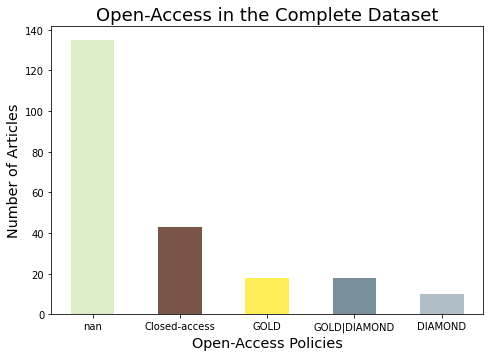

In [289]:
# BAR PLOT on Open-Access Distribution on complet dataset
fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1])

# Color system
colors = ['#dcedc8', '#795548', '#ffee58', '#78909c', '#b0bec5']

# Replace np.nan to str
data = overall_oa_count
data.index = data.index.map(str)

# Create all bars in the data
for i in range(len(data)):
    ax.bar(data.index[i], data[i], width=.5, color=colors[i])

plt.xlabel('Open-Access Policies', fontsize='x-large')
plt.ylabel('Number of Articles', fontsize='x-large')
plt.title('Open-Access in the Complete Dataset', fontsize=18)


In [177]:
# Build the OA counts dataframe to ease the chart process
oa_counts = pd.DataFrame([top_wos_oa_count_rel, top_tb_oa_count_rel, top_zb_oa_count_rel, overall_oa_count_rel]).transpose()

oa_counts

,WoS/Zoological Records,TreatmentBank,Zoobank,All
NaN,53.0,56.0,56.0,60.27
Closed-access,31.0,15.0,18.0,19.20
GOLD,8.0,14.0,10.0,8.04
DIAMOND,4.0,6.0,4.0,4.46
GOLD|DIAMOND,4.0,9.0,12.0,8.04


In [225]:
data = oa_counts
data.index = data.index.map(str)

for each in data:
    print(data[each].name)

WoS/Zoological Records
TreatmentBank
Zoobank
All


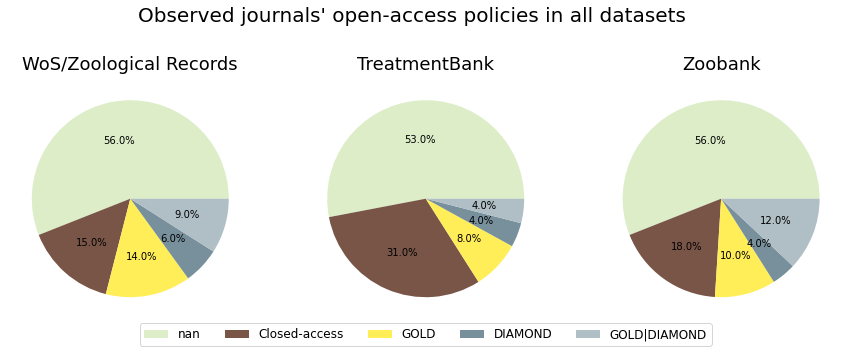

In [440]:
# BAR PLOT on Open-Access Distribution on complet dataset
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,15), constrained_layout=True)

# Replace np.nan to str
data = oa_counts
data.index = data.index.map(str)

# Color system
colors = ['#dcedc8', '#795548', '#ffee58', '#78909c', '#b0bec5']

# Create all three pies
ax2.pie(data['WoS/Zoological Records'], colors=colors, autopct='%.1f%%')
ax1.pie(data['TreatmentBank'], colors=colors, autopct='%.1f%%')
ax3.pie(data['Zoobank'], colors=colors, autopct='%.1f%%')

ax2.legend(data.index, loc=8, ncol=5, fontsize='large', borderaxespad=-2)

ax1.set_title('WoS/Zoological Records', fontsize=18)
ax2.set_title('TreatmentBank', fontsize=18)
ax3.set_title('Zoobank', fontsize=18)

fig.suptitle("Observed journals' open-access policies in all datasets", y=0.68, fontsize=20)

fig.subplots_adjust()

plt.show()

### Who are the biggest contributors?


In [84]:
# Prepare a wos-isolated df to ease manipulation
# Make a copy of entire df
top_wos = df

# Create a '%' column based on the records present on this already filtered (top 100) df. This will have the relative contribution of a journal within this dataset.
top_wos[('WoS/Zoological Records', '%')] = (top_wos['WoS/Zoological Records']['Sum'] / top_wos['WoS/Zoological Records']['Sum'].sum() * 100).round(2)

# Get only the data related to wos
top_wos = top_wos['WoS/Zoological Records']

# Sort the resulting filtered down dataset based on sum
top_wos = top_wos.sort_values(by='Sum', ascending=False)

top_wos

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Sum,%
Journal,,,,,,,,,,,,,
Zootaxa,1239.0,1263.0,1470.0,1543.0,1526.0,1799.0,1718.0,1723.0,1743.0,1788.0,1068.0,16880.0,36.28
ZooKeys,136.0,317.0,286.0,330.0,358.0,318.0,421.0,339.0,406.0,372.0,157.0,3440.0,7.39
Cretaceous Research,18.0,19.0,37.0,47.0,31.0,76.0,102.0,102.0,131.0,155.0,79.0,797.0,1.71
Journal of Natural History,72.0,69.0,74.0,69.0,67.0,48.0,61.0,66.0,71.0,70.0,1.0,668.0,1.44
PLoS ONE,13.0,35.0,43.0,71.0,103.0,96.0,78.0,81.0,58.0,54.0,25.0,657.0,1.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Journal of Orthoptera research,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00
Coleopterists bulletin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00
Zoological systematics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00


In [85]:
# This will calculates the real relative contribution of journals based on the original, non-filtered wos dataframe
# The steps to group, sum and sort are the same from transform.combine()
wos_contrib = wos_final.groupby(['Journal', 'Source', 'Year'])['Journal'].count().unstack(['Source','Year'])

wos_contrib = wos_contrib.reindex(sorted(wos_contrib.columns), axis=1)

wos_contrib['Sum'] = wos_contrib.iloc[:, 0:12].sum(axis=1)

wos_contrib.sort_values(by='Sum', ascending=False, inplace=True)

# Calculate the relative importance on the overall dataset, not the filtered one
wos_contrib['%'] = (wos_contrib['Sum'] / wos_contrib['Sum'].sum() * 100).round(2)

# Map the findings to the filtered dataframe
top_wos['% Real'] = top_wos.index.map(wos_contrib['%'].to_dict())

top_wos

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Sum,%,% Real
Journal,,,,,,,,,,,,,,
Zootaxa,1239.0,1263.0,1470.0,1543.0,1526.0,1799.0,1718.0,1723.0,1743.0,1788.0,1068.0,16880.0,36.28,21.05
ZooKeys,136.0,317.0,286.0,330.0,358.0,318.0,421.0,339.0,406.0,372.0,157.0,3440.0,7.39,4.29
Cretaceous Research,18.0,19.0,37.0,47.0,31.0,76.0,102.0,102.0,131.0,155.0,79.0,797.0,1.71,0.99
Journal of Natural History,72.0,69.0,74.0,69.0,67.0,48.0,61.0,66.0,71.0,70.0,1.0,668.0,1.44,0.83
PLoS ONE,13.0,35.0,43.0,71.0,103.0,96.0,78.0,81.0,58.0,54.0,25.0,657.0,1.41,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Journal of Orthoptera research,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
Coleopterists bulletin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
Zoological systematics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN


In [86]:
# Get the 'Sum' column
top_wos.head(25)[['Sum', '% Real']]

Year,Sum,% Real
Journal,,
Zootaxa,16880.0,21.05
ZooKeys,3440.0,4.29
Cretaceous Research,797.0,0.99
Journal of Natural History,668.0,0.83
PLoS ONE,657.0,0.82
European Journal of Taxonomy,566.0,0.71
Systematic and Applied Acarology,554.0,0.69
Journal of Vertebrate Paleontology,544.0,0.68
Systematic Parasitology,534.0,0.67


In [87]:
# Prepare a wos-isolated df to ease manipulation
# Make a copy of entire df
top_tb = df

# Create a '%' column based on the records present on this already filtered (top 100) df. This will have the relative contribution of a journal within this dataset.
top_tb[('TreatmentBank', '%')] = (top_tb['TreatmentBank']['Sum'] / top_tb['TreatmentBank']['Sum'].sum() * 100).round(2)

# Get only the data related to tb
top_tb = top_tb['TreatmentBank']

# Sort the resulting filtered down dataset based on sum
top_tb = top_tb.sort_values(by='Sum', ascending=False)

top_tb

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Sum,%
Journal,,,,,,,,,,,,,
Zootaxa,855.0,947.0,1050.0,1073.0,1132.0,1446.0,1384.0,1440.0,1385.0,1474.0,948.0,13134.0,69.64
ZooKeys,114.0,284.0,273.0,293.0,329.0,283.0,366.0,312.0,364.0,330.0,235.0,3183.0,16.88
European Journal of Taxonomy,NaN,3.0,24.0,30.0,24.0,52.0,74.0,100.0,82.0,75.0,100.0,564.0,2.99
PhytoKeys,4.0,20.0,33.0,24.0,28.0,42.0,61.0,52.0,67.0,91.0,89.0,511.0,2.71
MycoKeys,NaN,NaN,4.0,4.0,3.0,3.0,5.0,20.0,73.0,81.0,47.0,240.0,1.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Opuscula Zoologica, Budapest",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00
Palaeoentomology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00
Journal of the Marine Biological Association of the United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00


In [88]:
# This will calculates the real relative contribution of journals based on the original, non-filtered wos dataframe
# The steps to group, sum and sort are the same from transform.combine()
tb_contrib = tb_final.groupby(['Journal', 'Source', 'Year'])['Journal'].count().unstack(['Source','Year'])

tb_contrib = tb_contrib.reindex(sorted(tb_contrib.columns), axis=1)

tb_contrib['Sum'] = tb_contrib.iloc[:, 0:12].sum(axis=1)

tb_contrib.sort_values(by='Sum', ascending=False, inplace=True)

# Calculate the relative importance on the overall dataset, not the filtered one
tb_contrib['%'] = (tb_contrib['Sum'] / tb_contrib['Sum'].sum() * 100).round(2)

# Map the findings to the filtered dataframe
top_tb['% Real'] = top_tb.index.map(tb_contrib['%'].to_dict())

top_tb

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Sum,%,% Real
Journal,,,,,,,,,,,,,,
Zootaxa,855.0,947.0,1050.0,1073.0,1132.0,1446.0,1384.0,1440.0,1385.0,1474.0,948.0,13134.0,69.64,69.29
ZooKeys,114.0,284.0,273.0,293.0,329.0,283.0,366.0,312.0,364.0,330.0,235.0,3183.0,16.88,16.79
European Journal of Taxonomy,NaN,3.0,24.0,30.0,24.0,52.0,74.0,100.0,82.0,75.0,100.0,564.0,2.99,2.98
PhytoKeys,4.0,20.0,33.0,24.0,28.0,42.0,61.0,52.0,67.0,91.0,89.0,511.0,2.71,2.70
MycoKeys,NaN,NaN,4.0,4.0,3.0,3.0,5.0,20.0,73.0,81.0,47.0,240.0,1.27,1.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Opuscula Zoologica, Budapest",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
Palaeoentomology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
Journal of the Marine Biological Association of the United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN


In [89]:
# Get the 'Sum' column
top_tb.head(25)[['Sum', '% Real']]

Year,Sum,% Real
Journal,,
Zootaxa,13134.0,69.29
ZooKeys,3183.0,16.79
European Journal of Taxonomy,564.0,2.98
PhytoKeys,511.0,2.70
MycoKeys,240.0,1.27
Journal of Hymenoptera Research,176.0,0.93
Journal of Natural History,107.0,0.56
Biodiversity Data Journal,98.0,0.52
Insecta Mundi,77.0,0.41


In [90]:
# Prepare a wos-isolated df to ease manipulation
# Make a copy of entire df
top_zb = df

# Create a '%' column based on the records present on this already filtered (top 100) df. This will have the relative contribution of a journal within this dataset.
top_zb[('Zoobank', '%')] = (top_zb['Zoobank']['Sum'] / top_zb['Zoobank']['Sum'].sum() * 100).round(2)

# Get only the data related to tb
top_zb = top_zb['Zoobank']

# Sort the resulting filtered down dataset based on sum
top_zb = top_zb.sort_values(by='Sum', ascending=False)

top_zb

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Sum,%
Journal,,,,,,,,,,,,,
Zootaxa,103.0,162.0,728.0,1771.0,1714.0,1948.0,1938.0,1870.0,1966.0,1942.0,1463.0,15605.0,49.90
ZooKeys,102.0,148.0,243.0,263.0,421.0,431.0,507.0,427.0,497.0,471.0,321.0,3831.0,12.25
Journal of Threatened Taxa,8.0,23.0,106.0,115.0,92.0,104.0,93.0,123.0,139.0,97.0,3.0,903.0,2.89
European Journal of Taxonomy,NaN,4.0,29.0,26.0,28.0,45.0,67.0,102.0,76.0,76.0,95.0,548.0,1.75
Systematic & applied acarology,NaN,NaN,19.0,37.0,27.0,5.0,82.0,101.0,105.0,102.0,51.0,529.0,1.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Koleopterologische Rundschau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00
Historical Biology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00
SHILAP Revista de Lepidopterologia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00


In [91]:
# This will calculates the real relative contribution of journals based on the original, non-filtered wos dataframe
# The steps to group, sum and sort are the same from transform.combine()
zb_contrib = zb_final.groupby(['Journal', 'Source', 'Year'])['Journal'].count().unstack(['Source','Year'])

zb_contrib = zb_contrib.reindex(sorted(zb_contrib.columns), axis=1)

zb_contrib['Sum'] = zb_contrib.iloc[:, 0:12].sum(axis=1)

zb_contrib.sort_values(by='Sum', ascending=False, inplace=True)

# Calculate the relative importance on the overall dataset, not the filtered one
zb_contrib['%'] = (zb_contrib['Sum'] / zb_contrib['Sum'].sum() * 100).round(2)

# Map the findings to the filtered dataframe
top_zb['% Real'] = top_zb.index.map(zb_contrib['%'].to_dict())

top_zb

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Sum,%,% Real
Journal,,,,,,,,,,,,,,
Zootaxa,103.0,162.0,728.0,1771.0,1714.0,1948.0,1938.0,1870.0,1966.0,1942.0,1463.0,15605.0,49.90,39.80
ZooKeys,102.0,148.0,243.0,263.0,421.0,431.0,507.0,427.0,497.0,471.0,321.0,3831.0,12.25,9.77
Journal of Threatened Taxa,8.0,23.0,106.0,115.0,92.0,104.0,93.0,123.0,139.0,97.0,3.0,903.0,2.89,2.30
European Journal of Taxonomy,NaN,4.0,29.0,26.0,28.0,45.0,67.0,102.0,76.0,76.0,95.0,548.0,1.75,1.40
Systematic & applied acarology,NaN,NaN,19.0,37.0,27.0,5.0,82.0,101.0,105.0,102.0,51.0,529.0,1.69,1.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Koleopterologische Rundschau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.01
Historical Biology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.05
SHILAP Revista de Lepidopterologia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.01


In [92]:
# Get the 'Sum' column
top_zb.head(25)[['Sum', '% Real']]

Year,Sum,% Real
Journal,,
Zootaxa,15605.0,39.80
ZooKeys,3831.0,9.77
Journal of Threatened Taxa,903.0,2.30
European Journal of Taxonomy,548.0,1.40
Systematic & applied acarology,529.0,1.35
Insecta Mundi,447.0,1.14
Raffles Bulletin of Zoology,334.0,0.85
Far Eastern Entomologist,332.0,0.85
Acta Entomologica Musei Nationalis Pragae,308.0,0.79


### How do the sources compare to each other?

#### Total number of records

In [93]:
# Creates a dataframe with both total and filtered total records counts
total_count = pd.DataFrame([
    ['WoS/Zoological Records', wos_final.shape[0], top_wos['Sum'].sum()],
    ['TreatmentBank', tb_final.shape[0], top_tb['Sum'].sum()],
    ['Zoobank', zb_final.shape[0], top_zb['Sum'].sum()]],
    columns=['Source', 'Total Records', 'Filtered Records'],
    index=[1, 2, 3]).sort_values(by='Total Records', ascending=False)

# TODO: Change 'Filtered Records' type to integer

total_count

,Source,Total Records,Filtered Records
1,WoS/Zoological Records,80194,46531.0
3,Zoobank,39209,31272.0
2,TreatmentBank,18955,18859.0


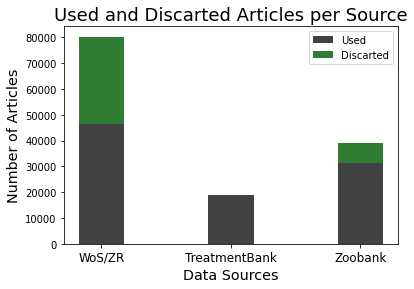

In [439]:
# Prepare the diff data, the part that will be on top of the stacked bar chart
wos_diff = total_count[total_count['Source'] == 'WoS/Zoological Records']['Total Records'] - total_count[total_count['Source'] == 'WoS/Zoological Records']['Filtered Records']

tb_diff = total_count[total_count['Source'] == 'TreatmentBank']['Total Records'] - total_count[total_count['Source'] == 'TreatmentBank']['Filtered Records']

zb_diff = total_count[total_count['Source'] == 'Zoobank']['Total Records'] - total_count[total_count['Source'] == 'Zoobank']['Filtered Records']

diff = (
    wos_diff.loc[1],
    tb_diff.loc[2],
    zb_diff.loc[3] 
    )

# Prepare the filtered data, the bottom part
filtered = (
    int(total_count[total_count['Source'] == 'WoS/Zoological Records']['Filtered Records'].loc[1]),
     int(total_count[total_count['Source'] == 'TreatmentBank']['Filtered Records'][2]),
     int(total_count[total_count['Source'] == 'Zoobank']['Filtered Records'][3])
    )

ind = np.arange(3)
width = 0.35

plot1 = plt.bar(ind, filtered, width, color='#424242', label='Used')
plot2 = plt.bar(ind, diff, width, bottom=filtered, color='#2e7d32', label='Discarted')

plt.xticks(ind, ('WoS/ZR', 'TreatmentBank', 'Zoobank'), fontsize='large')
plt.ylabel('Number of Articles', fontsize='x-large')
plt.xlabel('Data Sources', fontsize='x-large')
plt.title('Used and Discarted Articles per Source', fontsize=18)
plt.legend()

In [382]:
total_count[total_count['Source'] == 'TreatmentBank']['Filtered Records']

2    18859.0
Name: Filtered Records, dtype: float64

#### Comparison between the accumulative sums in all datasets

In [94]:
# Gets the accumulative real contribution of top 25 and 100 journals in all sources 
acc_contrib = [['WoS/Zoological Records', top_wos.head(25)['% Real'].sum().round(2), top_wos.head(100)['% Real'].sum().round(2)], ['TreatmentBank', top_tb.head(25)['% Real'].sum().round(2), top_tb.head(100)['% Real'].sum().round(2)], ['Zoobank', top_zb.head(25)['% Real'].sum().round(2), top_zb.head(100)['% Real'].sum().round(2)]]

acc_contrib

[['WoS/Zoological Records', 39.14, 57.97],
 ['TreatmentBank', 98.15, 99.59],
 ['Zoobank', 66.16, 79.76]]

In [95]:
# Creates the dataframe with the data combined in the previous cell
acc_df = pd.DataFrame(acc_contrib, columns=['Source', 'Top25', 'Top100'])

# Adds another column, with the difference between Top100 contribution and Top25
acc_df['Diff'] = acc_df['Top100'] - acc_df['Top25']

acc_df

,Source,Top25,Top100,Diff
0,WoS/Zoological Records,39.14,57.97,18.83
1,TreatmentBank,98.15,99.59,1.44
2,Zoobank,66.16,79.76,13.60


#### Plot over time, per source

In [96]:
# Extract only year columns from top_wos, and add name to the series
wos_yr = top_wos[[str(yr) for yr in range(2010, 2021)]].sum()

wos_yr.name = 'WoS/Zoological Records'

wos_yr

Year
2010    3460.0
2011    3817.0
2012    4245.0
2013    4309.0
2014    4327.0
2015    4747.0
2016    4764.0
2017    4774.0
2018    4887.0
2019    4866.0
2020    2335.0
Name: WoS/Zoological Records, dtype: float64

In [97]:
# Extract only year columns from top_tb, and add name to the series
tb_yr = top_tb[[str(yr) for yr in range(2010, 2021)]].sum()

tb_yr.name = 'TreatmentBank'

tb_yr

Year
2010     987.0
2011    1280.0
2012    1424.0
2013    1458.0
2014    1611.0
2015    1954.0
2016    2052.0
2017    2054.0
2018    2151.0
2019    2314.0
2020    1574.0
Name: TreatmentBank, dtype: float64

In [98]:
# Extract only year columns from top_zb, and add name to the series
zb_yr = top_zb[[str(yr) for yr in range(2010, 2021)]].sum()

zb_yr.name = 'Zoobank'

zb_yr

Year
2010     412.0
2011     579.0
2012    1500.0
2013    2742.0
2014    3067.0
2015    3616.0
2016    3854.0
2017    3914.0
2018    4248.0
2019    4290.0
2020    3050.0
Name: Zoobank, dtype: float64

In [99]:
# Build the Source-per-Year dataframe
docs_per_year = pd.DataFrame([wos_yr, tb_yr, zb_yr])

docs_per_year

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
WoS/Zoological Records,3460.0,3817.0,4245.0,4309.0,4327.0,4747.0,4764.0,4774.0,4887.0,4866.0,2335.0
TreatmentBank,987.0,1280.0,1424.0,1458.0,1611.0,1954.0,2052.0,2054.0,2151.0,2314.0,1574.0
Zoobank,412.0,579.0,1500.0,2742.0,3067.0,3616.0,3854.0,3914.0,4248.0,4290.0,3050.0


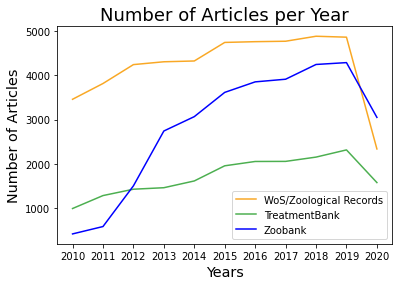

In [438]:
# Prepare data for plotting
data = docs_per_year.T
index = data.index

line1 = plt.plot(index, data['WoS/Zoological Records'], label='WoS/Zoological Records', color='#f9a825')
line2 = plt.plot(index, data['TreatmentBank'], label='TreatmentBank', color='#4caf50')
line3 = plt.plot(index, data['Zoobank'], label='Zoobank', color='blue')

plt.ylabel('Number of Articles', fontsize='x-large')
plt.xlabel('Years', fontsize='x-large')
plt.title('Number of Articles per Year', fontsize=18)

plt.legend()

## Conclusion

All major points were addressed and discussed on the [project deliverable]((https://hackmd.io/@mguidoti/S1veVwNHv), but here are the highlights:

- The data on open-access policy is sparsed through two different providers, and fairly incomplete;
- There are less concern about open-access in this zoological taxonomic community than I would have hoped for;
- Zootaxa and ZooKeys are the two most prolific journals for new species descriptions publication, with Zootaxa taking, by far, the largest share; 
- From #3 beyond the sources vary a lot;
- Web of Science/Zoological Records remain as the most complete dataset on zoological taxonomic research, regardless the efforts on promoting Zoobank;
- Zoobank data is the least curated, with more real duplicates and lack of data consistency, in addition to the somehow unstructured HTML;
- TreatmentBank is the most reliable source in terms of data consistency, but it's the smallest dataset, concentrated over 69% of its data from a single journal.



## References
I have included it all on [README.md]() and on the [blog post](https://hackmd.io/@mguidoti/S1veVwNHv).